# Industry exploration

## LDA model

In [9]:
import sys
import matplotlib.pyplot as plt
import pandas as pd

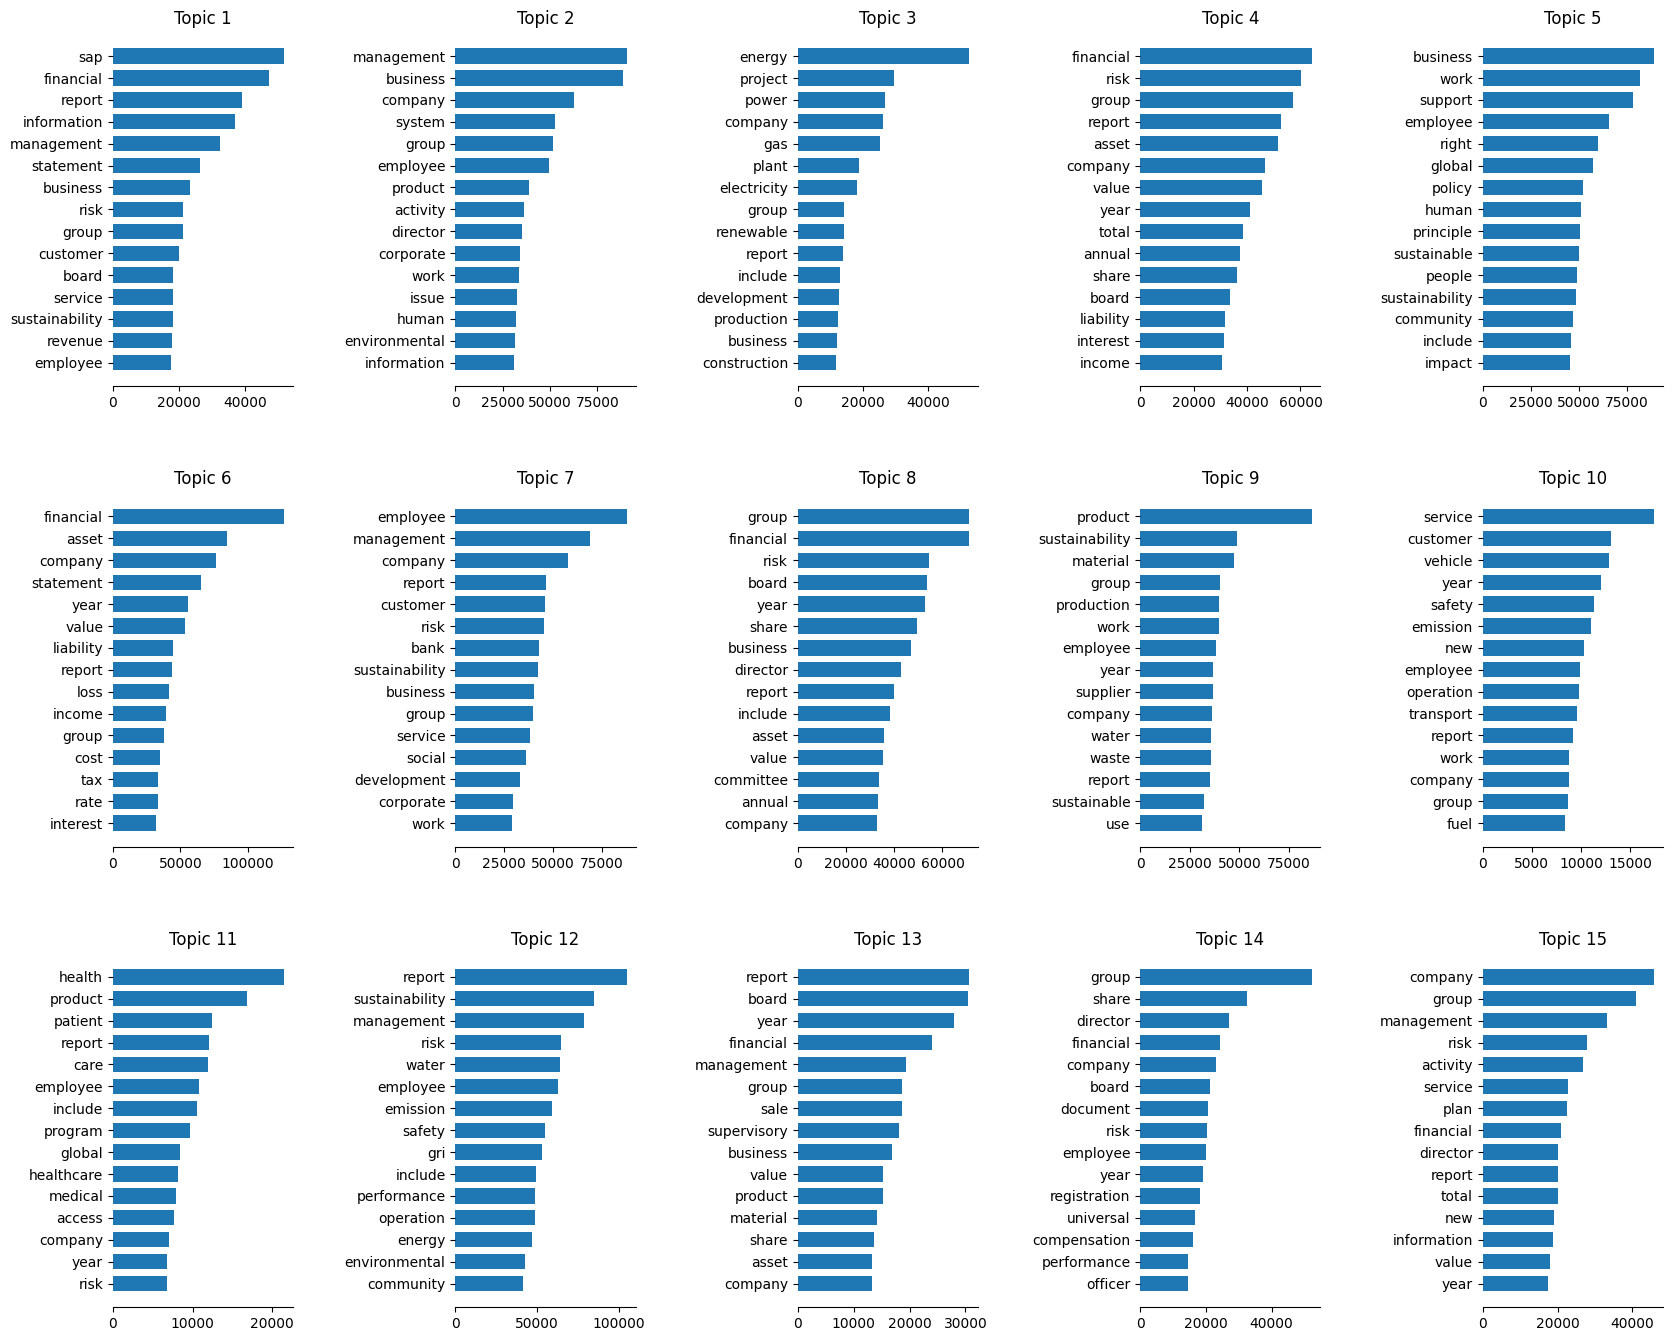

In [10]:
sys.path.append("../code")
from exploration import DataExploration
exploration = DataExploration().load_data()
exploration = exploration.construct_lda(n_topics=15)
exploration.plot_lda_top_words();

## Simple comparison

In [11]:
exploration.data.sector.value_counts().head(10)

sector
Not Applicable                  1045
Diversified                      587
Industrial Support Services      412
Software & Computer Services     333
General Industrials              293
Finance and credit services      266
Food Producers                   195
Chemicals                        177
Construction & Materials         176
Retailers                        158
Name: count, dtype: int64

In [26]:
doc_topic_distribution = pd.DataFrame(exploration.lda_model.transform(exploration.tf_data))
n_topics = doc_topic_distribution.shape[1]
doc_topic_distribution.columns = ["topic_{}".format(i) for i in range(1, n_topics + 1)]
doc_topic_distribution["sector"] = exploration.data.sector
sector_topic_distribution = doc_topic_distribution.groupby("sector", as_index=False).mean()
sector_topic_distribution = sector_topic_distribution\
    .merge(exploration.data.sector.value_counts(), on="sector").rename(columns={"count":"n_docs"})\
    .sort_values("n_docs", ascending=False).reset_index(drop=True)

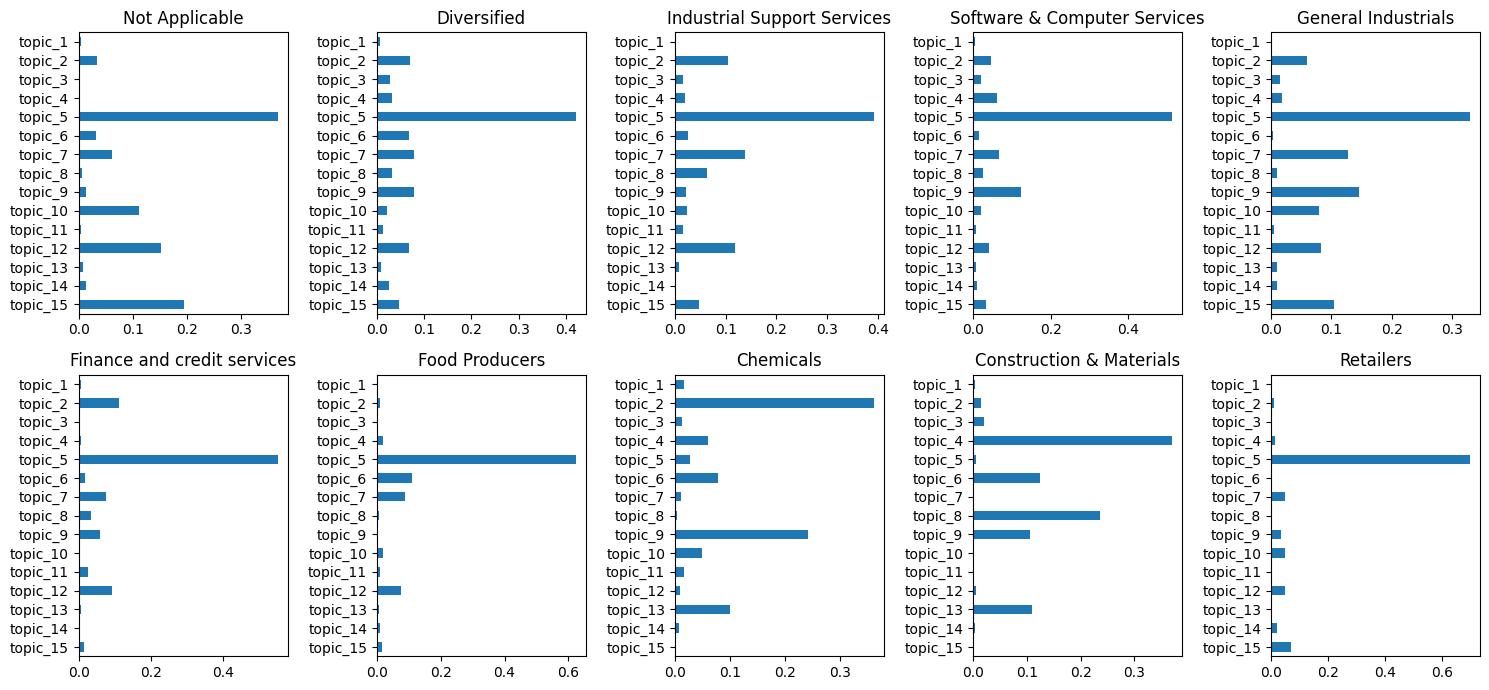

In [27]:
f, axs = plt.subplots(2, 5, figsize=(15, 7))
axs_flat = axs.flatten()
for i, r in sector_topic_distribution\
    .head(10).iterrows():
    sector = r["sector"]
    row_data = r.filter(regex="topic_")
    row_data.plot(kind="barh", ax=axs_flat[i])
    axs_flat[i].invert_yaxis()
    axs_flat[i].set_title(sector)
plt.tight_layout()

## Industry similarity

## Document similarity

### Manifold

### Hierarchical tree